Autor prezentacji: Marcin Massalski

**Zadanie B: Dywersja**

Dywersanci dostali się do systemu kanalizacyjnego pod miastem wroga, ale niestety nie wiedzą w którym jego
punkcie się znajdują. Dopóki nie ustalą swojej pozycji, nie mogą rozpocząć swoich działań dywersyjnych. Na
szczęście sprawny wywiad zaopatrzył ich w schemat sieci kanałów i kompas.

System składa się ze studzienek i kanałów pomiędzy nimi. Z każdej studzienki wychodzą dokładnie cztery
kanały - po jednym w każdym kierunku świata. Każdy z nich prowadzi (niektóre w bardzo skomplikowany sposób)
również do studzienki. Może zdarzyć się, że jest to ta sama studzienka, lub że kilka wychodzących kanałów prowadzi
do tego samego celu. Konstrukcja kanałów pozwala na poruszanie się tylko w jednym kierunku. Nikt przecież nie
chciałby brnąć pod prąd, prawda? 

Dywersanci zamierzają poruszać siś kanałami korzystając z kompasu aż uzyskają pewność w której studzience
się znajdują Grupa dywersantów nie może się rozdzielić i nie ma żadnego sposobu, żeby oznaczyć studzienki, z
których każda wygląda dokładnie tak samo.

Wszystko byłoby stracone, gdyby nie genialny pomysł porucznika Szuki -- być może istnieje taki ciąg kierunków,
który doprowadzi dywersantów do pewnej ustalonej studzienki bez względu na ich pozycję początkową? Sprawdź
czy ten pomysł pozwoli dywersantom ustalić swoje położenie, czy już na zawsze utkną w kanałach.


**Wejście** Pierwsza linia wejścia zawiera małą liczbę całkowitą $T$ - liczbę zestawów danych występujących kolejno po
sobie. Opis pojedynczego zestawu jest nastąpujący:

W pierwszym wierszu podana jest liczba $1 \le n \le 1000$ studzienek. W następnych $n$ wierszach znajduję się po
cztery liczby całkowite. W $i$-tym wierszu są podane numery studzienek do których można się dostać udając się
odpowiednio na północ, wschód, południe i zachód ze studzienki $i$.

**Wyjście**
Dla każdego zestawu w jedynym wierszu wyjścia powinno znaleść się `TAK` , jeżeli dywersanci potrafią określić
swoją pozycję na mapie i `NIE` w przeciwnym wypadku.

#### Kod do rysowania

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

In [2]:
def add_connection(ax, a,b, direction, size=0.4, size2=0.45, n=4):
    i, j = a, b
    if direction == "N":
        ax.plot([i, i, -2-a/n*size, -2-i/n*size], 
                 [i+size2, n+i/(n/size), n+i/(n/size), j+(n-i)/(n/size)], color="blue")
        ax.annotate('', arrowprops=dict(arrowstyle='->', color="blue"), 
                    xy=(j-size2, j+(n-i)/(n/size)), 
                    xytext=(-2-0.03-i/(n/size),  j+(n-i)/(n/size)))
    if direction == "E":
        ax.plot([i+size2, n+(n-i)/(n/size), n+(n-i)/(n/size), j-(n-i)/(n/size)], 
                 [i, i, n+1+(n-i)/(n/size), n+1+(n-i)/(n/size)], color="red")
        ax.annotate('', arrowprops=dict(arrowstyle='->', color="red"),
                    xy=(j-(n-i)/(n/size), j+size2),  
                    xytext=(j-(n-i)/(n/size), n+1+(n-i)/(n/size)+0.03 ))
    if direction == "S":
        ax.plot([i, i, n+1+(n-i)/(n/size), n+1+(n-i)/(n/size)], 
                 [i-size2, -1-(n-i)/(n/size), -1-(n-i)/(n/size), j-(i+1)/(n/size)], color="green")
        ax.annotate('',arrowprops=dict(arrowstyle='->', color="green"),
                    xy=(j+size2, j-(i+1)/(n/size)), 
                    xytext=(n+1+(n-i)/(n/size)+0.03, j-(i+1)/(n/size) ))
    if direction == "W":
        ax.plot([i-size2, -1-i/(n/size), -1-i/(n/size), j+(i+1)/(n/size)], 
                 [i,i, -2-i/(n/size), -2-i/(n/size)], color="orange")
        ax.annotate('', arrowprops=dict(arrowstyle='->', color="orange"),
                    xy=(j+(i+1)/(n/size), j-size2),  
                    xytext=(j+(i+1)/(n/size), -2-(i)/(n/size)-0.03 ))
      
      

(-2.6849999999999996, 5.785, -2.6849999999999996, 5.785)

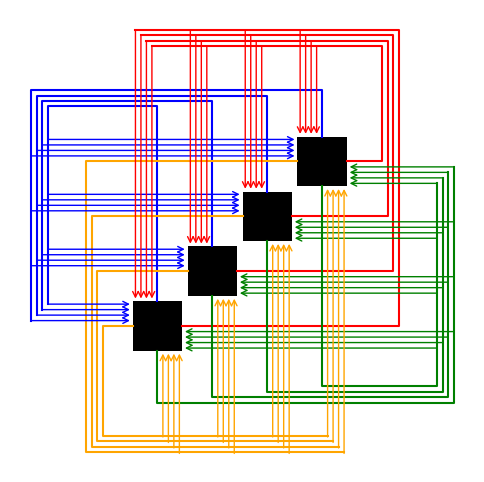

In [3]:
fig, ax = plt.subplots(figsize=(6, 6))
from matplotlib.patches import Circle, PathPatch, Rectangle
for i in range(4):
    rect = Rectangle((i-0.45, i-0.45), 0.9, 0.9, facecolor='black', joinstyle="round")
    ax.add_patch(rect)
ax.plot([0,3],[0,3], linewidth=0)
n = 4
size = 0.4
size2 = 0.45
for i in range(4):
    plt.plot([i, i, -2-i/n*size, -2-i/n*size], [i+size2, n+i/(n/size), n+i/(n/size), (n-i)/(n/size)], color="blue")
for i in range(4):
    plt.plot([i+size2, n+(n-i)/(n/size), n+(n-i)/(n/size), -(n-i)/(n/size)], [i, i, n+1+(n-i)/(n/size), n+1+(n-i)/(n/size)], color="red")
for i in range(4):
    plt.plot([i, i, n+1+(n-i)/(n/size), n+1+(n-i)/(n/size)], [i-size2, -1-(n-i)/(n/size), -1-(n-i)/(n/size), n-1-(i+1)/(n/size)], color="green")
for i in range(4):
    plt.plot([i-size2, -1-i/(n/size), -1-i/(n/size), n-1+(i+1)/(n/size)], [i,i, -2-i/(n/size), -2-i/(n/size)], color="orange")
def connect(a,b, direction):
    if direction == "N":
        pass
for j in range(4):
    for i in range(4):
        ax.annotate('', xy=(j-size2, j+(n-i)/(n/size)), arrowprops=dict(arrowstyle='->', color="blue"), 
                    xytext=(-2-0.03-i/(n/size),  j+(n-i)/(n/size)))

for j in range(4):
    for i in range(4):
        ax.annotate('', xy=(j-(n-i)/(n/size), j+size2), arrowprops=dict(arrowstyle='->', color="red"), 
                    xytext=(j-(n-i)/(n/size), n+1+(n-i)/(n/size)+0.03 ))

for j in range(4):
    for i in range(4):
        ax.annotate('', xy=(j+size2, j-(i+1)/(n/size)), arrowprops=dict(arrowstyle='->', color="green"), 
                    xytext=(n+1+(n-i)/(n/size)+0.03, j-(i+1)/(n/size) ))
        
for j in range(4):
    for i in range(4):
        ax.annotate('', xy=(j+(i+1)/(n/size), j-size2), arrowprops=dict(arrowstyle='->', color="orange"), 
                    xytext=(j+(i+1)/(n/size), -2-(i+1)/(n/size)+0.03 ))

plt.axis('equal')
plt.axis("off")

### przykładowa sekwencja kierunków

In [4]:
data = """3
3
1 1 1 3
2 2 3 1
3 3 3 2
2
1 1 1 2
2 2 2 1
4
4 3 4 1
3 4 3 2
2 4 2 4
1 1 1 3"""

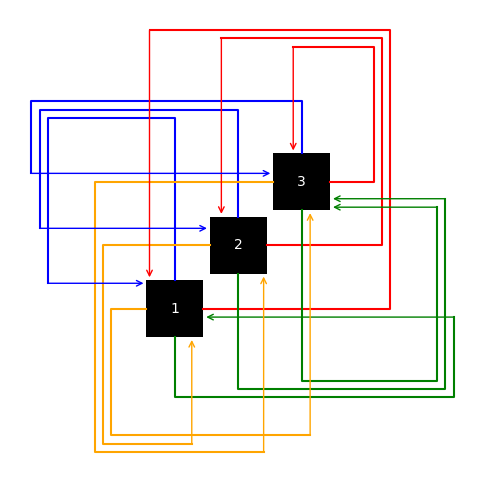

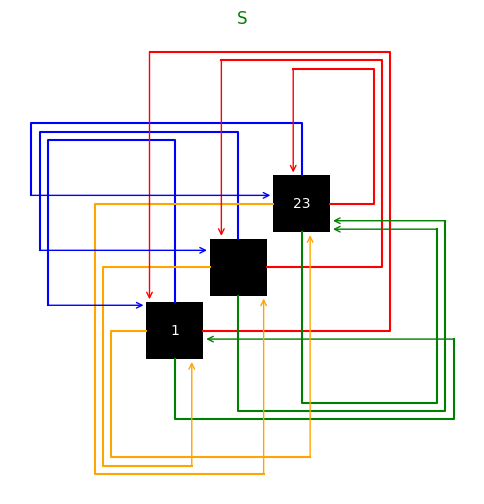

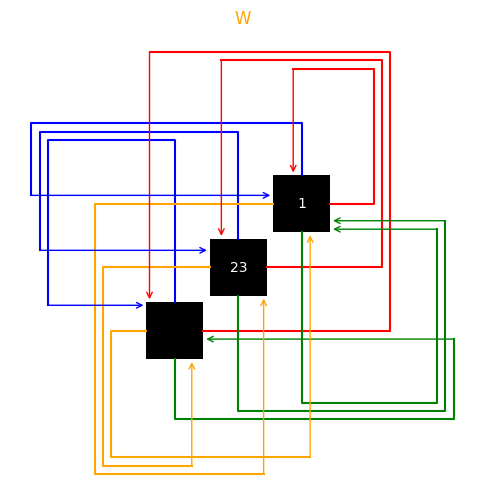

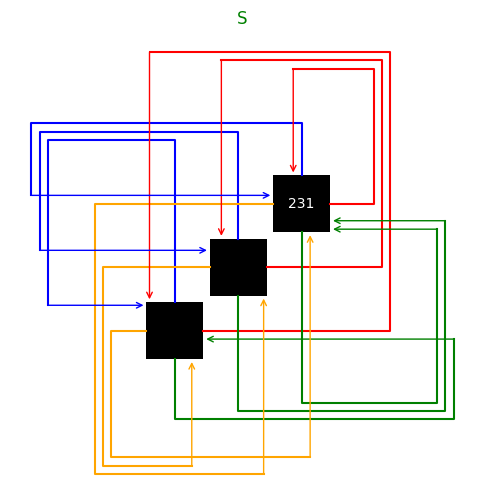

In [6]:
"""with open("grafy dywersja.txt") as f:
    cases_count = int(f.readline())
    graphs = []
    for _ in range(cases_count):
        graphs.append(dict())
        n = int(f.readline())
        for v in range(1, n+1):
            vertexN, vertexE, vertexS, vertexW = map(int, f.readline().split())
            graphs[-1][v] = {"N":vertexN,"E": vertexE,"S":vertexS, "W":vertexW}
"""
lines = data.split("\n")
cases_count = int(lines.pop(0))
graphs = []
for _ in range(cases_count):
    graphs.append(dict())
    n = int(lines.pop(0))
    for v in range(1, n+1):
        vertexN, vertexE, vertexS, vertexW = map(int, lines.pop(0).split())
        graphs[-1][v] = {"N":vertexN,"E": vertexE,"S":vertexS, "W":vertexW}

def draw_map(graph, annotations):
    fig, ax = plt.subplots(figsize=(6, 6))
    from matplotlib.patches import Circle, PathPatch, Rectangle
    n = len(graph)
    order = {v:i for i, v in enumerate(graph)}
    for i, _ in enumerate(graph):
        rect = Rectangle((i-0.45, i-0.45), 0.9, 0.9, facecolor='black', joinstyle="round")
        ax.add_patch(rect)
        ax.text(i, i, annotations[i],
            horizontalalignment='center',
            verticalalignment='center', color="white")
    ax.plot([0,3],[0,3], linewidth=0)
    for u in graph:
        ui = order[u]
        for direction, v in graph[u].items():
            vi = order[v]
            add_connection(ax, ui, vi, direction, n=n)
    plt.axis('equal')
    plt.axis('off')

state = ["1", "2", "3"]
draw_map(graphs[0], state)
for move in "SWS":
    new_state = [""]*3
    for i , text in enumerate(state):
        pos = graphs[0][i+1][move]
        new_state[pos-1] += text
    draw_map(graphs[0], new_state)
    plt.title(move, color = {"N": "blue", "W": "orange", "S":"green", "E":"red"}[move])
    state = new_state.copy()

### Rozwiązanie

Słowo synchronizujące istnieje wtedy i tylko wtedy, gdy dla każdej pary wierzchołków istnieje słowo je synchornizujące (zobacz twierdzenie poniżej). Tworzymy graf skierowany $H$, gdzie $V\times V$ jest zbiorem wierzchołków, a krawędź z $(u, v)$ do $(x,y)$ należy do grafy wtedy i tylko wtedy, gdy istnieje kierunek na mapie, wzdłóż którego z $u$ można przejśc do $x$ oraz z $v$ można przejść do $y$. Wówczas para wierzchołków $(u,v)$ ma sekwencje synchronizującą jeśli istnieje ścieżka w grafie $H$ z $(u,v)$ do $(x,x)$ dla pewnego $x\in V$. Zatem aby sprawdzić istnienie słowa synchronizującego wystarczy sprawdzić  czy przeszukując graf przeciwny do $H$ i startując z wierzchołków $\{(x,x) : x\in V\}$ odwiedzimy wszystkie wierzchołki grafu $H$. Przeszukiwanie można zrealizować za pomocą DFS albo BFS.

**Złożnosć rozwiązania**: Graf $H$ ma $n^2$ wierzchołków oraz $4n^2$ krawędzi. Przeszukanie tego grafu DFS-em zajmuje $O(n^2)$ operacji. Pozostałe operacje też mają taką lub mniejszą złożoność. Zatem algorytm ma złożoność $O(n)$.

### Twierdzenie o słowie synchronizującym
**Definicje** Niech $G$ będzie grafem skierowanym, w którym z każdego wierzchołka wychodzi $k$ krawędzi o dokładnie $k$ różnych kolorach, przy czym w grafie korzystam tylko z tych $k$ kolorów. Słowem $P=a_1a_2\ldots a_m$ nazwiemy dowolny skończony ciąg kolorów. Dopuszczamy ciąg pusty. Oznaczmy $u \rightarrow^{P}v$, jeżeli z wierzchołka $u$ do wierzchołka $v$ można przejść korzystając kolejno z krawędzi o kolorach $a_1, \ldots ,a_m$ ze słowa $P$ tzn. w $i$ tym kroku korzystam z krawędzi o kolorze $a_i$. Słowo $S$ nazwiemy synchronizującym zbiór wierzchołków $X$, jeżeli istnieje wierzchołek $v$ taki, że dla każdego $u\in X$ zachodzi $u \rightarrow^{S}v$, co będziemy zapisywać $X \rightarrow^{S}v$.

**Twierdzenie** *Niech $G$ będzie grafem skierowanym, w którym z każdego wierzchołka wychodzi $k$ krawędzi o kolorach odpowiednio
$1,\ldots, k$. Wówczas poniższe stwierdzenia są równoważne*
 * (i) *Istnieje słowo synchronizujące wszyskie wierzchołki*
 * (ii) *Dla każdej pary wierzchołków (u,v) istnieje słowo je synchornizujące*

**Dowód:** Niech $G$ i $k$ będzie jak w treści twierdzenia. 

Implikacja (i) => (ii) jest oczywista, bo jeżeli $S$ jest słowem synchronizującym wszystkie wierzchołki, to tym bardzie jest słowem synchronizującym dowolną parę wierzchołków.

Implikacja (ii) => (i). Z założenia dla każdej pary $(u,v)$ istnieje słowo $S(u,v)$ synchornizującą parę $(u,v)$. Niech $V(G)=\{v_1,\ldots,v_n\}$. Słowo $P_n$ synchronizujące wszystkie wierzchołki utworzymy rekurencyjnie. Zdefiniujmy $P_1$ jako puste słowo, a wtedy oczywiście $v_1 \rightarrow^{P_1} v_1$. 

Załóżmy, że zdefiniowaliśmy słowo $P_k$ synchornizujące wierzchołki $v_1,v_2,\ldots, v_k$ do pewnego wierzchołka $a$ tzn. $\{v_1,\ldots,v_k\} \rightarrow^{P_k} a$. Jeżeli $k<n$, to istnieje $k+1$-wszy wierzchołek $v_{k+1}$, a wtedy $v_{k+1}\rightarrow^{P_{k}} b$ dla pewnego wierzchołka $b$. Zdefiniujmy słowo $P_{k+1}:= P_{k}S(a, b)$, gdzie $S(a,b)$ synchronizuje wierzchołki $a,b$ do wierzchołka $c$. Wówczas $P_{k+1}$ jest słowem synchronizującym wierzchołki $\{v_1,\ldots,v_k,v_{k+1}\}$, bo $v_{k+1} \rightarrow^{P_k} b \rightarrow^{S(a,b)} c$ oraz $\{v_1,\ldots,v_k\} \rightarrow^{P_k} a \rightarrow^{S(a,b)} c$. Postępują w ten sposób zdefiniujemy słowa $P_1,\ldots, P_n$, a ostatnie słowo $P_n$ będzie synchronizować wszystkie wierzchołki $v_1,\ldots, v_n$.

In [7]:
import networkx as nx
class ProblemSolver:
    def __init__(self, graph):
        """
        Tworzy graf par wierzchołków
        """
        self.graph = graph
        self.pair_graph = dict()
        for u in graph:
            for v in graph:
                self.pair_graph[(u, v)] = []
                #print((u,v))
        self.labels = dict()
        for u in graph:
            for v in graph:
                for direction in ["N", "E", "S", "W"]:
                    u1 = graph[u][direction]
                    v1 = graph[v][direction]
                    self.pair_graph[(u1, v1)].append((u, v))
                    self.labels[((u1, v1),(u, v))] = direction
        
    
    def can_synchronize_DFS(self):
        """
        Sprawdza czy istnieje słowo synchornizujące i 
        tworzy strukturę do znajdywania słów synchronizujące pary.
        Wykorzystuje przeszukwanie wzdłuż.
        """
        visited = dict()
        for x in self.pair_graph:
            visited[x] = False
        self.prev = dict()
        
        def dfs(x):
            visited[x] = True
            for y in self.pair_graph[x]:
                if not visited[y]:
                    self.prev[y] = (x, self.labels[(x,y)])
                    dfs(y)

        ## sprawdzam czy do każdej pary (u,v) można dojść startując od (x,x)
        ## Wówczas (u,v) ma sekwencje sychronizującą
        ## 
        for u in self.graph:
            dfs((u,u)) 
        
        has_sequence = True
        for x in self.pair_graph:
            if not visited[x]:
                has_sequence = False
                break
        return has_sequence
    
    def can_synchronize_BFS(self):
        """
        Sprawdza czy istnieje słowo synchornizujące i 
        tworzy strukturę do znajdywania słów synchronizujące pary.
        Wykorzystuje przeszukwanie wzdłuż przez co znajduje najkrótsze
        słowa synchronizujące pary.
        """
        visited = dict()
        for x in self.pair_graph:
            visited[x] = False
        self.prev = dict()
        ## sprawdzam czy do każdej pary (u,v) można dojść startując od (x,x)
        ## 
        
        to_process = [(u,u) for u in self.graph]
        for u in self.graph:
            visited[(u,u)] = True
        
        while len(to_process) > 0:
            x = to_process.pop(0)
            for y in self.pair_graph[x]:
                if not visited[y]:
                    to_process.append(y)
                    visited[y] = True
                    self.prev[y] = (x, self.labels[(x,y)])
            
        has_sequence = True
        for x in self.pair_graph:
            if not visited[x]:
                has_sequence = False
                break
        return has_sequence
    
    def shortest_synchronization(self):
        """
        Znajduje najkrótsze słowo synchornizujące wszystkie wierzchołki.
        Algorytm ma wykładniczą złożoność.
        """
        n = len(self.graph)
        orderiv = {i:v for i, v in enumerate(self.graph)}
        ordervi = {v:i for i, v in enumerate(self.graph)}
        
        def move(state, direction):
            new_state = [False]*n
            for (i, s), u in zip(enumerate(state), self.graph):
                if s:
                    v = self.graph[u][direction]
                    j = ordervi[v]
                    new_state[j] = True
            return tuple(new_state)
        
        start = tuple([True]*n)
        to_process = [start]
        prev = {start : (None, '')}
        
        found_synch = False
        while len(to_process) > 0:
            x = to_process.pop(0)
            for direction in "NESW":
                y = move(x, direction)
                if y not in prev:
                    prev[y] = (x, direction)
                    to_process.append(y)
                    if sum(y) == 1:
                        found_synch = True
                        break
            if found_synch:
                break
        seq = ''
        if found_synch:
            while y is not None:
                y, direction = prev[y]
                seq = direction + seq
                
        return seq if found_synch else None
                
    
    def synchronize_pair(self, pair):
        """
        Zwraca słowo synchornizujące parę wierzchołki i zwraca
        wierzchołek do którego słowo synchronizuje
        """
        sequence = ""
        u = pair
        while u in self.prev:
            u, direction = self.prev[u]
            sequence += direction
        end = u[0]
        return sequence, end
        
    def move(self, start, sequence):
        """
        Zwraca wierzchołek, do którego przedziemy zaczynając
        w wierzchołku `start`, a poruszając się 
        zgodnie ze słowem `sequence`
        """
        u = start
        for direction in sequence:
            u = self.graph[u][direction]
        return u
    
    def synchronize_all(self):
        """
        Zwraca słowo synchronizujące wszystkie wierzchołki.
        """
        sequence = ""
        a = None
        for u in self.graph:
            b = self.move(u, sequence)
            if a is None:
                a = b
            seq, a = self.synchronize_pair((a,b))
            sequence += seq
        return sequence
    
    def visualize_moves(self, moves):
        """
        Tworzy wizualizacje synchronizacji za pomocą słowa
        """
        state = "ABCDEFGHIJKLMNOPRST"[:len(self.graph)]
        draw_map(self.graph, state)
        for move in moves:
            new_state = [""]*len(self.graph)
            for i , text in enumerate(state):
                pos = self.graph[i+1][move]
                new_state[pos-1] += text
            draw_map(self.graph, new_state)
            plt.title(move, color = {"N": "blue", "W": "orange", "S":"green", "E":"red"}[move])
            state = new_state.copy()
    
    def visualize_pair_graph(self):
        """
        Rysuje graf par wierzchołków
        """
        to_process = [(u,u) for u in self.graph]
        to_process_next = []
        layers = {}
        visited = {x:False for x in self.pair_graph}
        i = 0
        while len(to_process) > 0:
            layers[i] = []
            while len(to_process) > 0:
                x = to_process.pop()
                if visited[x]:
                    continue
                visited[x] = True
                layers[i].append(x)
                for y in self.pair_graph[x]:
                    to_process_next.append(y)
            to_process = to_process_next
            to_process_next = []
            i += 1
        DG = nx.DiGraph()
        for x in self.pair_graph:
            for y in self.pair_graph[x]:
                DG.add_edge(y, x)
        _t = max(layers.keys())
        pos = nx.multipartite_layout(DG, subset_key={i:layers[_t-i] for i in layers}, align='horizontal')
        nx.draw(DG, pos, with_labels=True, node_size=1200)
            

### sprawdzenie algorytmów

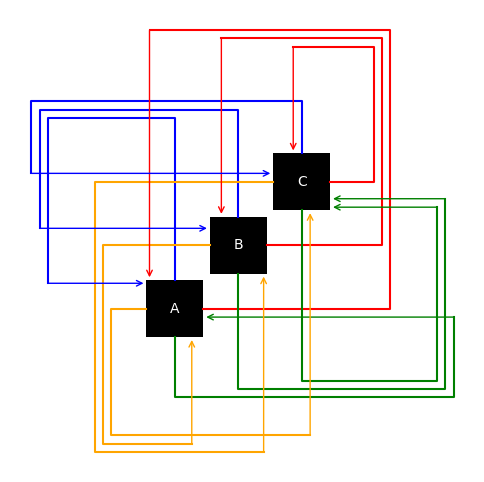

In [8]:
problem = ProblemSolver(graphs[0])
problem.visualize_moves([])

In [9]:
problem.can_synchronize_DFS()

True

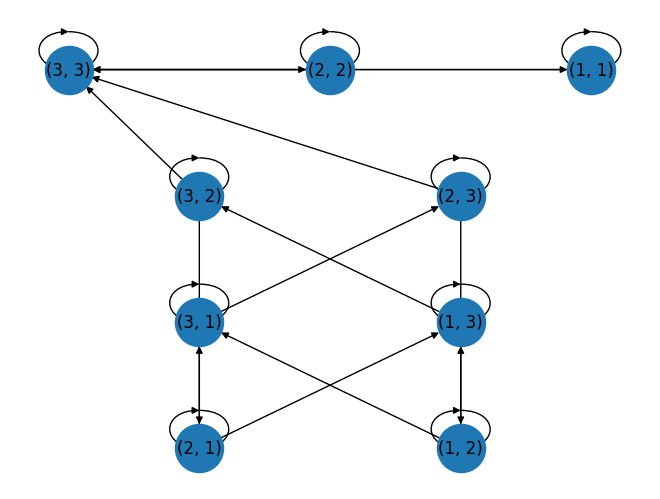

In [10]:
problem.visualize_pair_graph() # graf na parach wierzchołków

sekwencja synchronizująca wszystkie wierzchołki: WWSWWWWSWW
sekwencja synchronizująca wierzchołki 1 2: WWSWW


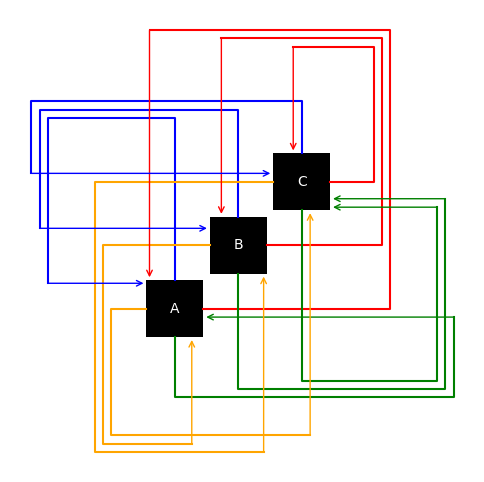

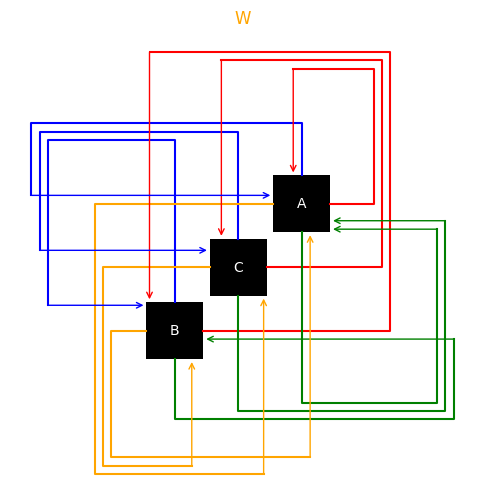

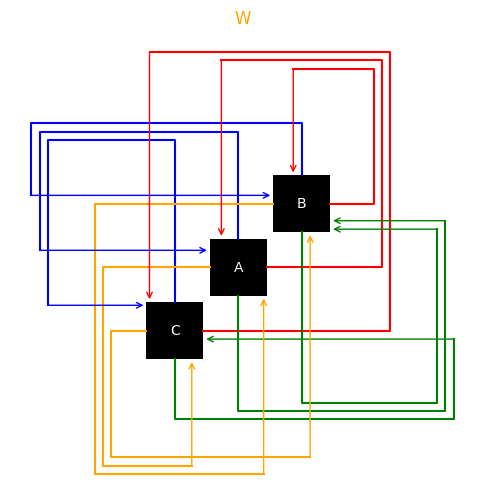

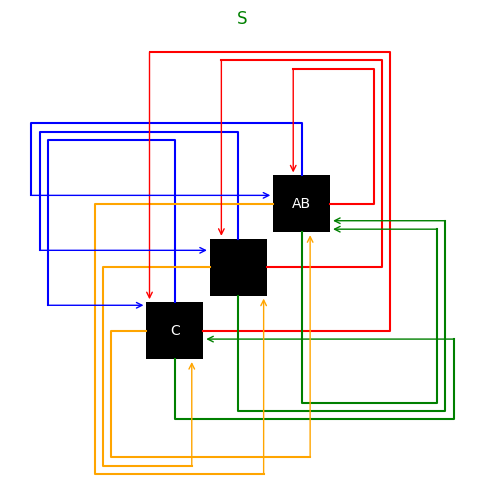

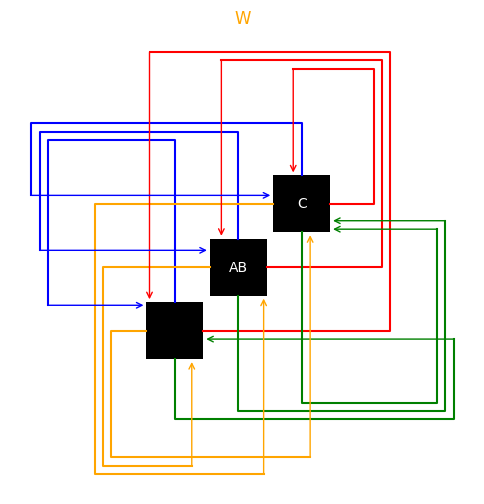

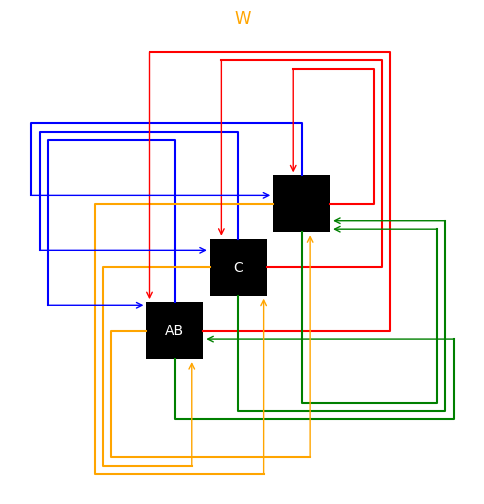

In [11]:
seq = problem.synchronize_all()
print(f"sekwencja synchronizująca wszystkie wierzchołki: {seq}")

seq, _ = problem.synchronize_pair((1,2))
print(f"sekwencja synchronizująca wierzchołki 1 2: {seq}")
problem.visualize_moves(seq)
#problem.synchronize_all()

Widać, że słowo jest bardzo długie. Stosując w algorytmie przeszukiwanie wszerz zamiast w głąb otrzymujemy krótsze słowa.

sekwencja synchronizująca: WWSWS


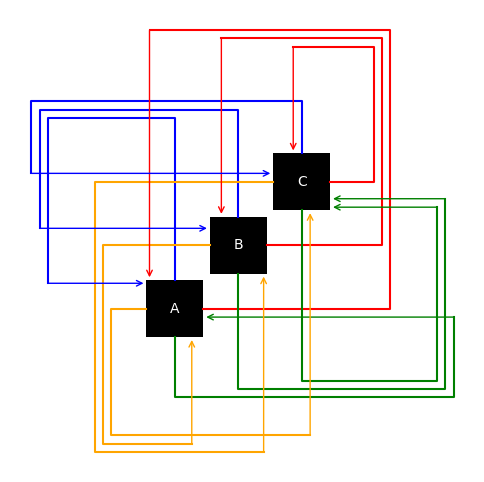

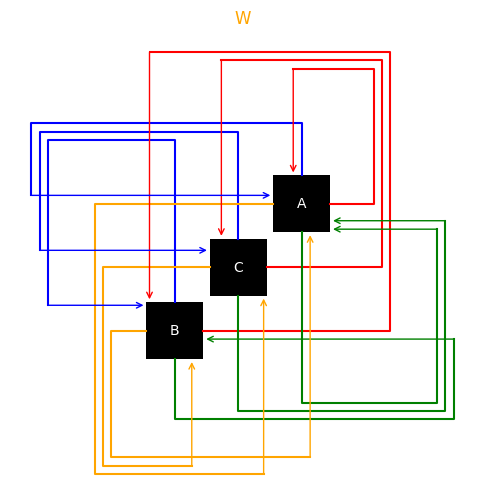

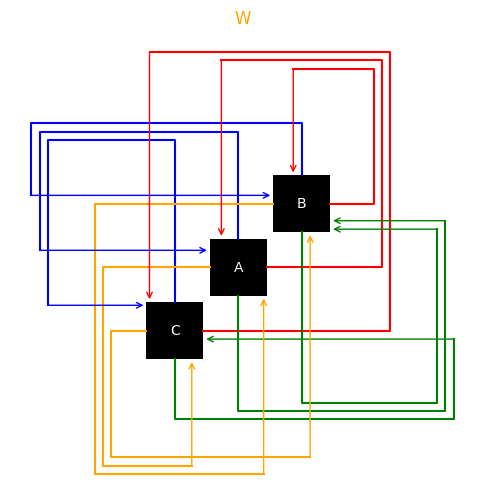

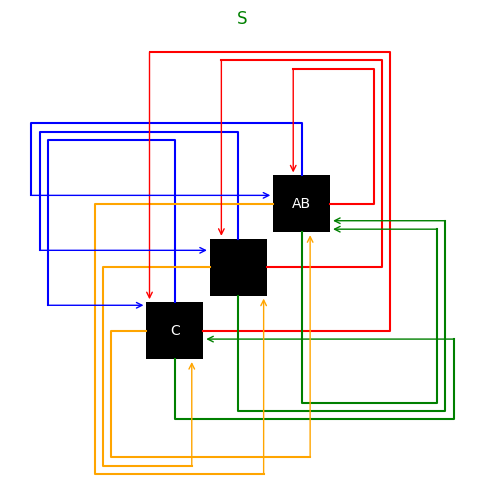

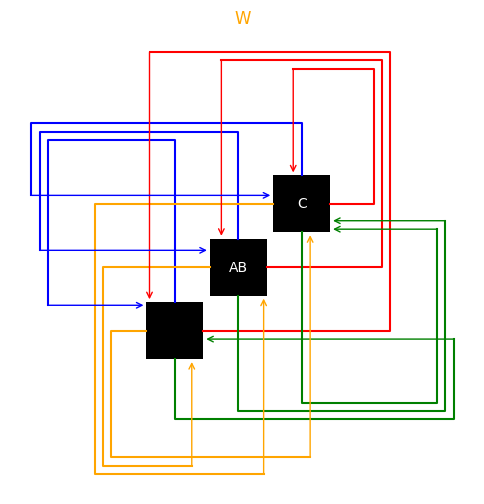

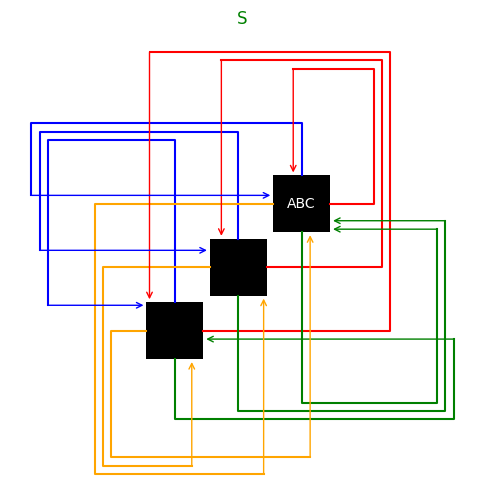

In [12]:
problem = ProblemSolver(graphs[0])
problem.can_synchronize_BFS()
seq = problem.synchronize_all()
print(f"sekwencja synchronizująca: {seq}")
problem.visualize_moves(seq)

### Szukanie długich słów synchornizujących (bonus)

In [13]:
import numpy as np
graph = {i:{d:np.random.randint(1,5) for d in "NESW"} for i in range(1,5)}

In [14]:
for _ in range(1000000):
    graph = {i:{d:np.random.randint(1,5) for d in "NESW"} for i in range(1,5)}
    problem1 = ProblemSolver(graph)
    if problem1.can_synchronize_BFS():
        s = problem1.shortest_synchronization()
        if len(s) > 8:
            print(s, len(s))
            break
    #else:
    #    print("no solution")
    #    break

WNNWNWNNW 9


In [32]:
problem1 = ProblemSolver(graphs[2])
problem1.can_synchronize_BFS()
problem1.shortest_synchronization()

'ENWNEENWE'

In [27]:
problem1.graph

{1: {'N': 4, 'E': 3, 'S': 4, 'W': 1},
 2: {'N': 3, 'E': 4, 'S': 3, 'W': 2},
 3: {'N': 2, 'E': 4, 'S': 2, 'W': 4},
 4: {'N': 1, 'E': 1, 'S': 1, 'W': 3}}

In [34]:
seq = problem1.synchronize_all()
print(f"słowo synchornizujące: {seq} (długość {len(seq)})")

słowo synchornizujące: SEESWEEESWE (długość 11)


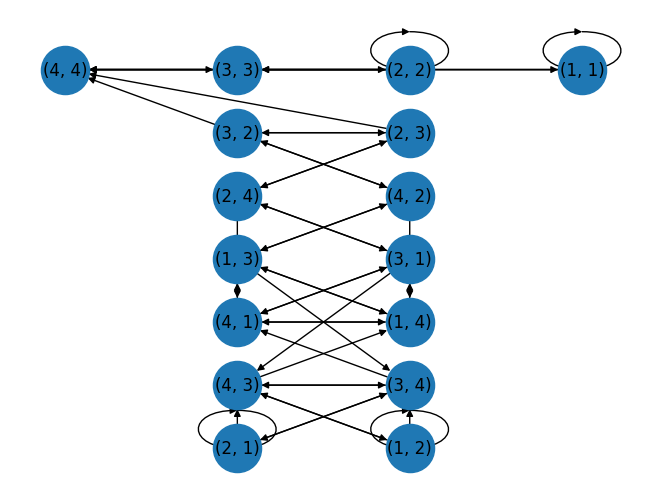

In [29]:
problem1.visualize_pair_graph()

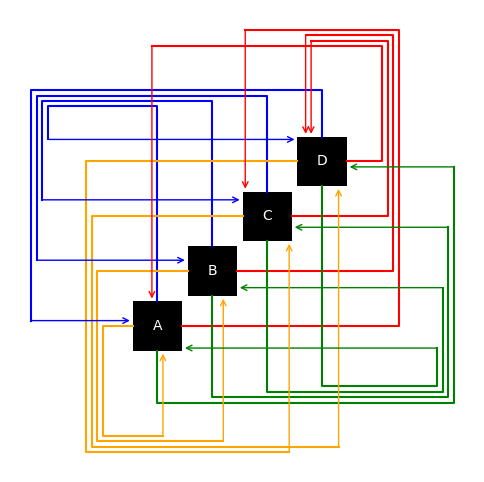

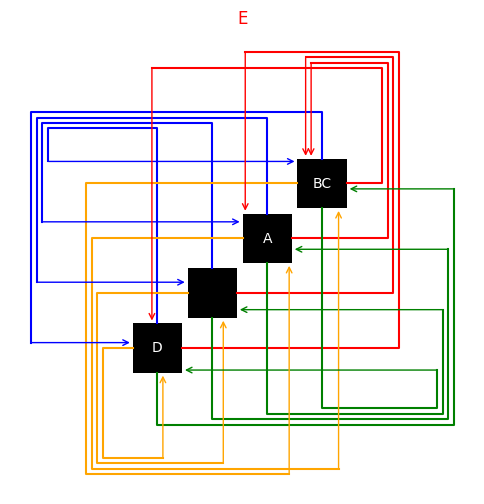

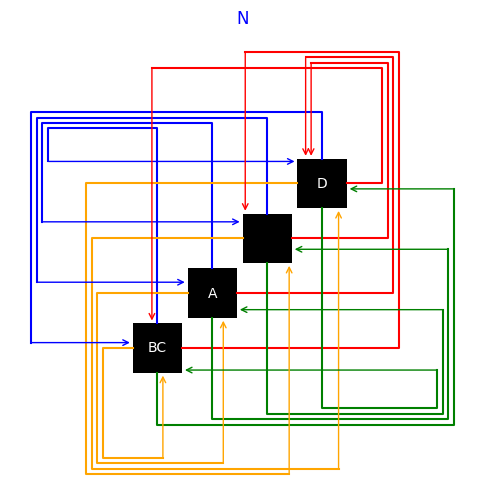

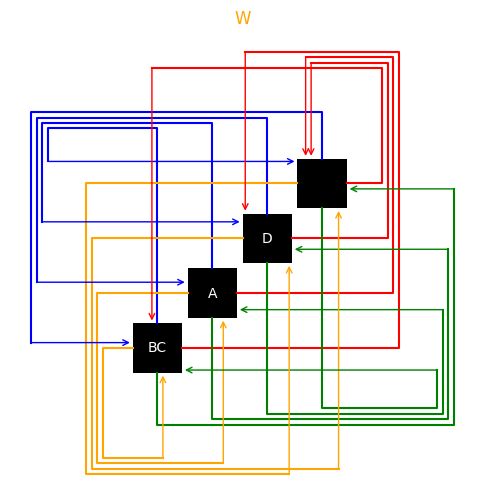

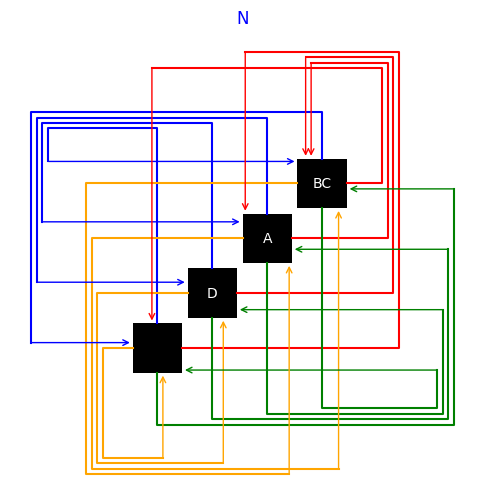

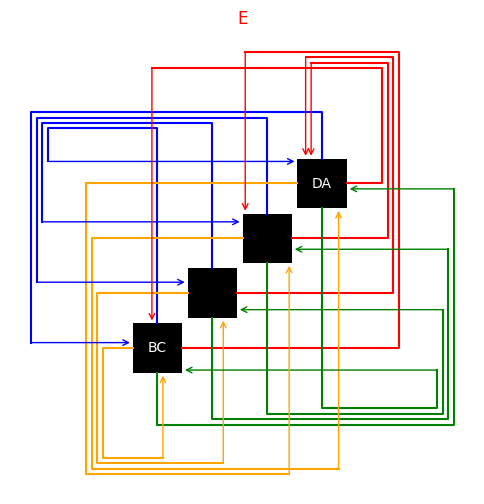

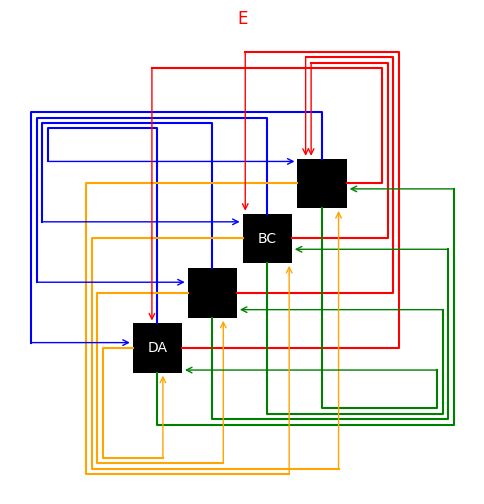

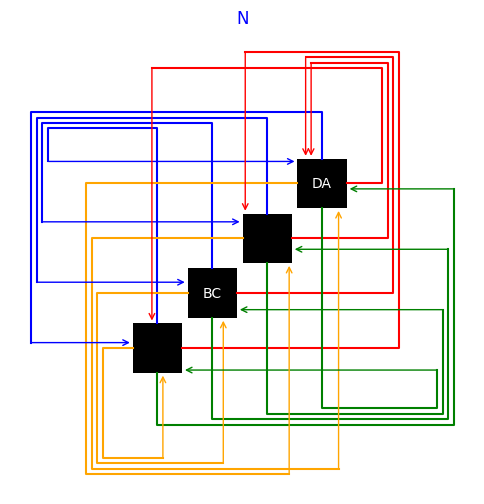

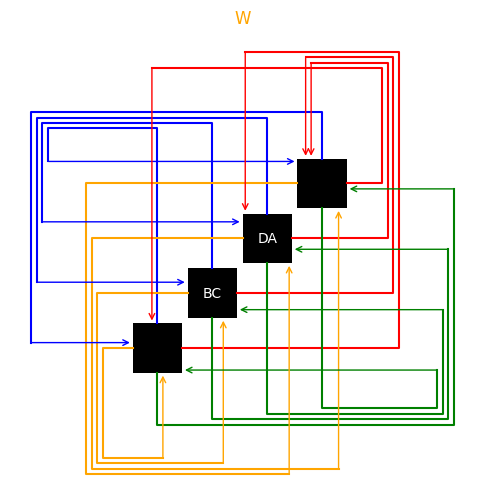

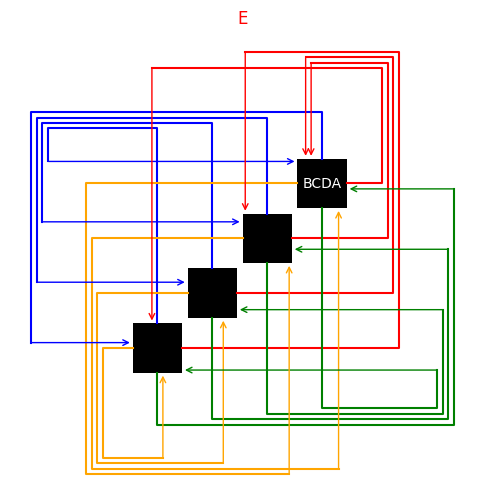

In [33]:
problem1.visualize_moves("ENWNEENWE")